In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("netflix data.csv")

In [3]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


# Is there any null value, if yes, show with heatmap and handle it accordingly

In [5]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<Axes: >

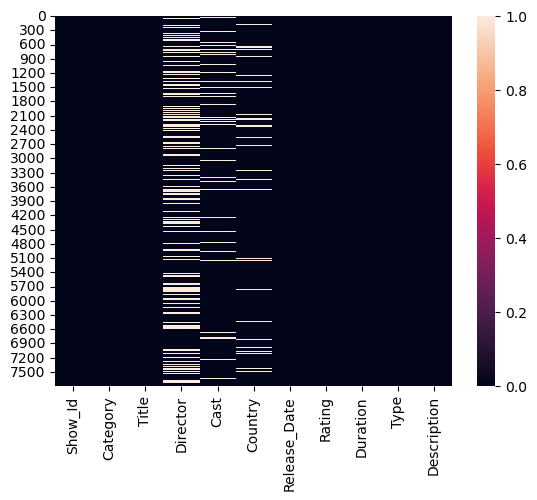

In [6]:
sns.heatmap(df.isnull())

In [7]:
df["Director"]=df["Director"].fillna("Not available")

In [8]:
df["Cast"]=df["Cast"].fillna("Not available")

In [9]:
df["Country"]=df["Country"].fillna("Not available")

In [10]:
df=df.dropna()

# Is there any duplicate value, if yes, remove it from the data

In [11]:
df.duplicated().sum()

2

In [12]:
df=df.drop_duplicates()

# For "House of cards" who is the show director and what is the show id

In [13]:
df2=df[df["Title"]=="House of Cards"]
df2[["Director", "Show_Id"]]

,Director,Show_Id
2832,"Robin Wright, David Fincher, Gerald McRaney, J...",s2833


# In which year the highest number of TV Shows and Movies were released? 

In [14]:
df['Date']=pd.to_datetime(df['Release_Date'])

In [15]:
df["Year"] = df["Date"].dt.year


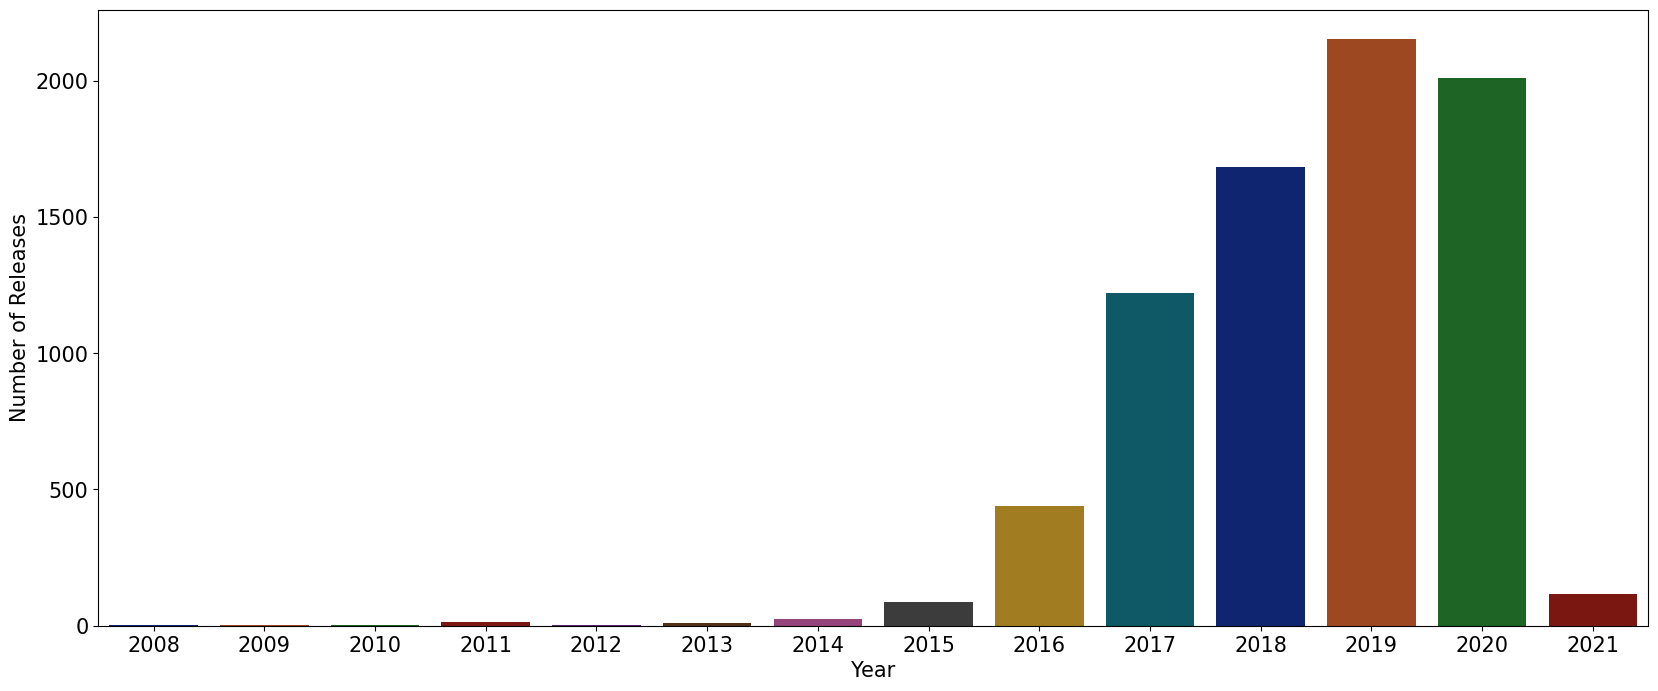

In [16]:
plt.figure(figsize=(20,8))
sns.countplot(x=df["Year"], palette='dark')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Releases', fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [17]:
#Conclusion: From graph we can see that highest number of movies or shows were released in year 2019, followed by 2020 and 2018.

# How many movies and shows are there in dataset?

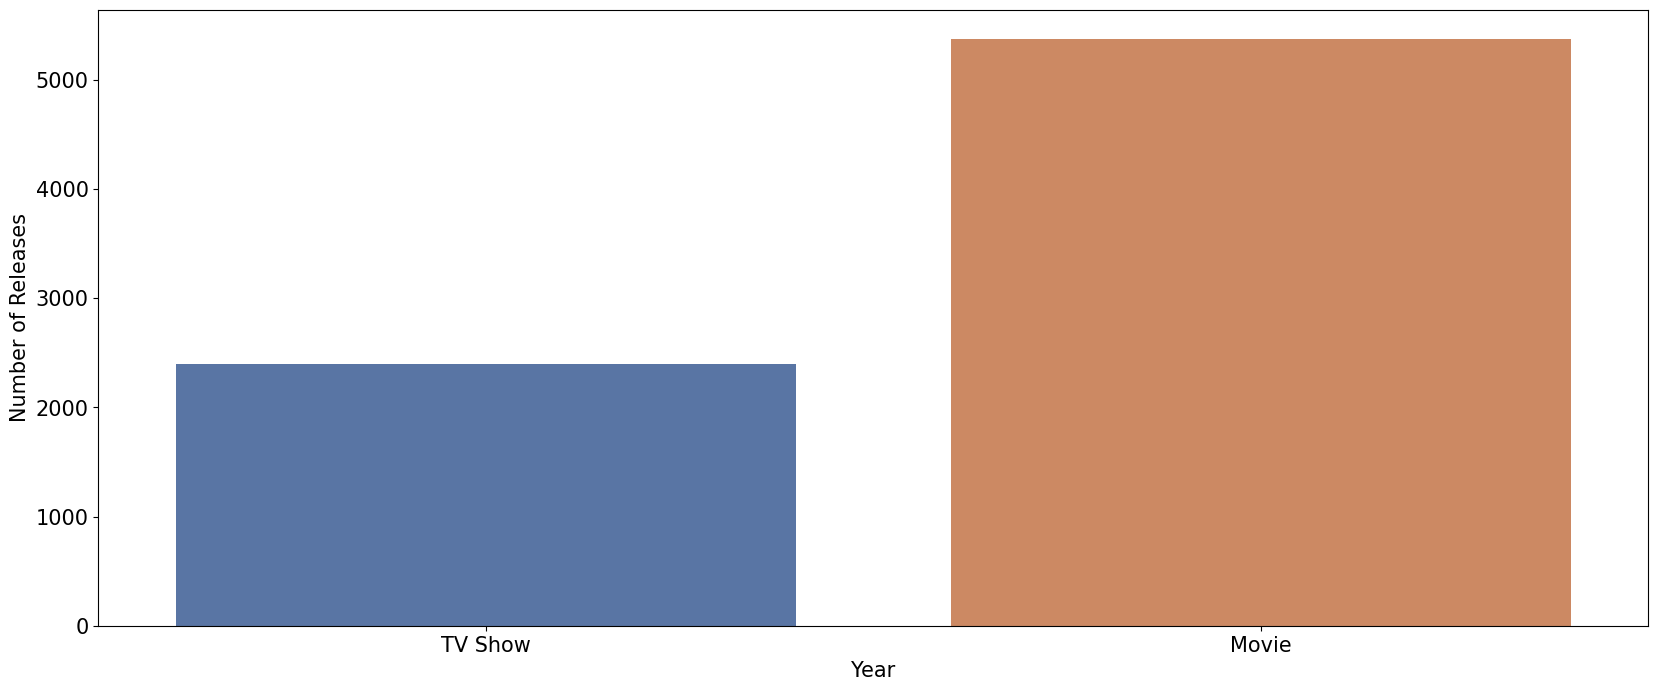

In [18]:
plt.figure(figsize=(20,8))
sns.countplot(x=df["Category"], palette='deep')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Releases', fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Show all the movies that were released in year 2020

In [19]:
df.loc[15:20].head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
15,s16,Movie,Oct-01,Kunle Afolayan,"Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...",Nigeria,"September 1, 2019",TV-14,149 min,"Dramas, International Movies, Thrillers",Against the backdrop of Nigeria's looming inde...,2019-09-01,2019
16,s17,TV Show,Feb-09,Not available,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Not available,"March 20, 2019",TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019-03-20,2019
17,s18,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States","October 10, 2018",R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ...",2018-10-10,2018
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019-03-29,2019
19,s20,Movie,'89,Not available,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16,2018


In [20]:
df2 = df[(df["Year"] == 2020) & (df["Category"] == 'Movie')]
df2[["Title", "Duration"]]

,Title,Duration
4,21,123 min
6,122,95 min
14,3022,91 min
27,#Alive,99 min
28,#AnneFrank - Parallel Stories,95 min
...,...,...
7762,Zaki Chan,109 min
7783,Zoom,88 min
7784,Zozo,99 min
7786,Zulu Man in Japan,44 min


# Show top 10 directors who gave most tv shows and movies to netflix

In [21]:
df5 = df.groupby(['Director'])[['Director']].value_counts().reset_index(name="No. of Shows")
df5 = df5.rename(columns={'Director': "Name of Director"})
df5 = df5.sort_values(by="No. of Shows", ascending= False)
df5[df5["Name of Director"]!= "Not available"].head(10)


,Name of Director,No. of Shows
3077,"Raúl Campos, Jan Suter",18
2319,Marcus Raboy,16
1606,Jay Karas,14
623,Cathy Garcia-Molina,13
1603,Jay Chapman,12
2386,Martin Scorsese,12
4007,Youssef Chahine,12
3599,Steven Spielberg,10
874,David Dhawan,9
3182,Robert Rodriguez,8


# In how many movies there was Tom Cruise?

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7770 non-null   object        
 1   Category      7770 non-null   object        
 2   Title         7770 non-null   object        
 3   Director      7770 non-null   object        
 4   Cast          7770 non-null   object        
 5   Country       7770 non-null   object        
 6   Release_Date  7770 non-null   object        
 7   Rating        7770 non-null   object        
 8   Duration      7770 non-null   object        
 9   Type          7770 non-null   object        
 10  Description   7770 non-null   object        
 11  Date          7770 non-null   datetime64[ns]
 12  Year          7770 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 1.1+ MB


In [23]:
df[df['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019


# What are the different ratings defined by Netflix

In [24]:
df["Rating"].nunique()

14

In [25]:
df["Rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

# Which individual country has the highest number of Shows or movies

In [45]:
df4=df.groupby(["Country"])[['Country']].value_counts().reset_index(name= 'No. of Shows/Movies')
df4.sort_values(by="No. of Shows/Movies", ascending=False).head(1)

,Country,No. of Shows/Movies
550,United States,2546
